In [ ]:
#Import libraries

import os

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dataset_train = pd.read_csv("FB.csv")
dataset_train.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-23,182.500000,186.910004,182.179993,186.899994,186.899994,16628100
1,2018-05-24,185.880005,186.800003,185.029999,185.929993,185.929993,12354700
2,2018-05-25,186.020004,186.330002,184.449997,184.919998,184.919998,10965100
3,2018-05-29,184.339996,186.809998,183.710007,185.740005,185.740005,16398900
4,2018-05-30,186.539993,188.000000,185.250000,187.669998,187.669998,13736900


In [ ]:
training_set = dataset_train.iloc[:,1:2].values

print(training_set)
print(training_set.shape)

[[182.5     ]
 [185.880005]
 [186.020004]
 [184.339996]
 [186.539993]
 [187.869995]
 [193.070007]
 [191.839996]
 [194.300003]
 [191.029999]
 [190.75    ]
 [187.529999]
 [188.809998]
 [192.169998]
 [192.740005]
 [193.100006]
 [195.789993]
 [194.800003]
 [196.240005]
 [199.100006]
 [202.759995]
 [201.160004]
 [200.      ]
 [197.600006]
 [199.179993]
 [195.179993]
 [197.320007]
 [193.369995]
 [194.550003]
 [194.740005]
 [198.449997]
 [204.929993]
 [204.5     ]
 [202.220001]
 [203.429993]
 [207.809998]
 [207.5     ]
 [204.899994]
 [209.820007]
 [208.770004]
 [208.850006]
 [210.580002]
 [215.110001]
 [215.720001]
 [174.889999]
 [179.869995]
 [175.300003]
 [170.669998]
 [173.929993]
 [170.679993]
 [177.690002]
 [178.970001]
 [186.5     ]
 [184.75    ]
 [185.850006]
 [182.039993]
 [180.100006]
 [180.710007]
 [179.339996]
 [180.419998]
 [174.5     ]
 [174.039993]
 [172.809998]
 [172.210007]
 [173.089996]
 [173.699997]
 [175.990005]
 [178.100006]
 [176.300003]
 [175.899994]
 [177.149994]
 [173.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler. fit_transform(training_set)

scaled_training_set

array([[0.64133017],
       [0.67782342],
       [0.67933496],
       [0.66119624],
       [0.68494918],
       [0.69930895],
       [0.75545246],
       [0.74217227],
       [0.76873248],
       [0.73342689],
       [0.7304038 ],
       [0.69563808],
       [0.70945798],
       [0.74573524],
       [0.75188949],
       [0.75577635],
       [0.78481961],
       [0.77413089],
       [0.78967831],
       [0.82055717],
       [0.86007336],
       [0.84279857],
       [0.83027423],
       [0.80436197],
       [0.82142078],
       [0.77823356],
       [0.80133887],
       [0.75869137],
       [0.77143169],
       [0.7734831 ],
       [0.81353916],
       [0.8835024 ],
       [0.87885985],
       [0.85424315],
       [0.86730719],
       [0.91459725],
       [0.91125026],
       [0.88317851],
       [0.93629892],
       [0.92496225],
       [0.92582601],
       [0.94450444],
       [0.99341395],
       [1.        ],
       [0.55916648],
       [0.61293452],
       [0.56359321],
       [0.513

In [ ]:
X_train = []

y_train = []

for i in range(60,252):
 X_train.append(scaled_training_set[i-60:i, 0])
 y_train.append(scaled_training_set[i, 0])

X_train = np.array(X_train)

y_train = np.array(y_train)

In [ ]:


print(X_train.shape)
print(y_train. shape)

(192, 60)
(192,)


In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

X_train.shape


(192, 60, 1)

In [ ]:
from keras.models import Sequential
from keras. layers import LSTM
from keras. layers import Dense
from keras. layers import Dropout


In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout (0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1) )

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error' )
regressor.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
6/6 [==============================] - 7s 102ms/step - loss: 0.0936
Epoch 2/100
6/6 [==============================] - 1s 103ms/step - loss: 0.0278
Epoch 3/100
6/6 [==============================] - 1s 102ms/step - loss: 0.0239
Epoch 4/100
6/6 [==============================] - 1s 103ms/step - loss: 0.0200
Epoch 5/100
6/6 [==============================] - 1s 105ms/step - loss: 0.0173
Epoch 6/100
6/6 [==============================] - 1s 103ms/step - loss: 0.0172
Epoch 7/100
6/6 [==============================] - 1s 106ms/step - loss: 0.0130
Epoch 8/100
6/6 [==============================] - 1s 108ms/step - loss: 0.0141
Epoch 9/100
6/6 [==============================] - 1s 107ms/step - loss: 0.0123
Epoch 10/100
6/6 [==============================] - 1s 107ms/step - loss: 0.0096
Epoch 11/100
6/6 [==============================] - 1s 105ms/step - loss: 0.0100
Epoch 12/100
6/6 [==============================] - 1s 105ms/step - loss: 0.0088
Epoch 13/100
6/6 [===================

In [ ]:
dataset_test = pd.read_csv("FB.csv")
actual_stock_price = dataset_test.iloc[:,1:2].values

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)- len(dataset_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60,250):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)





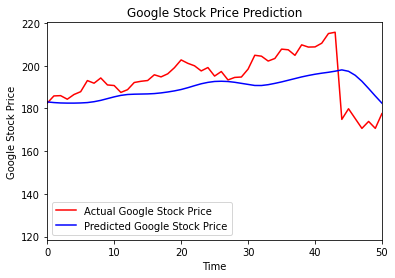

In [ ]:
plt.plot(actual_stock_price, color = 'red', label = 'Actual Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title( 'Google Stock Price Prediction')

plt.xlabel('Time')

plt.xlim(0,50)

plt.ylabel('Google Stock Price')

plt.legend()

In [59]:
actual_stock_price

array([[182.5     ],
       [185.880005],
       [186.020004],
       [184.339996],
       [186.539993],
       [187.869995],
       [193.070007],
       [191.839996],
       [194.300003],
       [191.029999],
       [190.75    ],
       [187.529999],
       [188.809998],
       [192.169998],
       [192.740005],
       [193.100006],
       [195.789993],
       [194.800003],
       [196.240005],
       [199.100006],
       [202.759995],
       [201.160004],
       [200.      ],
       [197.600006],
       [199.179993],
       [195.179993],
       [197.320007],
       [193.369995],
       [194.550003],
       [194.740005],
       [198.449997],
       [204.929993],
       [204.5     ],
       [202.220001],
       [203.429993],
       [207.809998],
       [207.5     ],
       [204.899994],
       [209.820007],
       [208.770004],
       [208.850006],
       [210.580002],
       [215.110001],
       [215.720001],
       [174.889999],
       [179.869995],
       [175.300003],
       [170.6

In [60]:
predicted_stock_price

array([[183.07027],
       [182.77457],
       [182.58154],
       [182.51616],
       [182.51376],
       [182.58817],
       [182.76389],
       [183.17957],
       [183.80379],
       [184.61963],
       [185.44193],
       [186.13716],
       [186.54823],
       [186.69444],
       [186.74715],
       [186.82492],
       [186.98233],
       [187.29774],
       [187.72467],
       [188.24213],
       [188.88573],
       [189.7329 ],
       [190.68149],
       [191.57425],
       [192.23279],
       [192.65753],
       [192.758  ],
       [192.6374 ],
       [192.27155],
       [191.75873],
       [191.19884],
       [190.77875],
       [190.76198],
       [191.15419],
       [191.76064],
       [192.4462 ],
       [193.23975],
       [194.07727],
       [194.78911],
       [195.45651],
       [196.04825],
       [196.53755],
       [196.96205],
       [197.47115],
       [198.08461],
       [197.42677],
       [195.55139],
       [192.74841],
       [189.35626],
       [185.84245],
